# General Social Survey
### Divorce-related variable exploration

This notebook look at the [General Social Survey](https://gss.norc.org/) (GSS), exploring divorce-related variables over the 50+ years of survey data. The primary data file for this exploration (gss7221_r2.dta) can be found in the [GSS Strata archive](https://gss.norc.org/documents/stata/GSS_stata.zip). If you want to work with this data for your own analysis, it is also essential to review the survey [codebooks](https://gss.norc.org/Get-Documentation).

Special thanks to [Allen Downey](https://github.com/AllenDowney) for all the work they have published on crafting jupyter notebooks with GSS data.

This notebook is part of the [GeneralSocialSurvey](https://github.com/CulleyHarrelson/GeneralSocialSurvey) github repository.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#import convenience function, column selection and data clensing functions
import gss_functions


In [2]:
# load the data
gss = pd.read_stata('gss7221_r2.dta', columns=gss_functions.columns(), convert_categoricals=False)
gss_functions.gss_replace_invalid(gss)


In [3]:
# check that we've cleaned all columns that need it;
# all columns we've added NaN to should be floats

# some columns have no missing values
# TODO: this needs to be updated for this particular exploration
clean_columns = ["id", "year", "ballot", "sex", "race", "reg16", "region", "srcbelt"]

for column in gss.columns:
    if gss[column].dtype == int and column not in clean_columns:
        print(f"'{column}', ", end="")
print()


# Variable: marital

These two plots both look at the GSS <em>marital</em> variable. The first plot is a [count plot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) and the second is a [histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot).

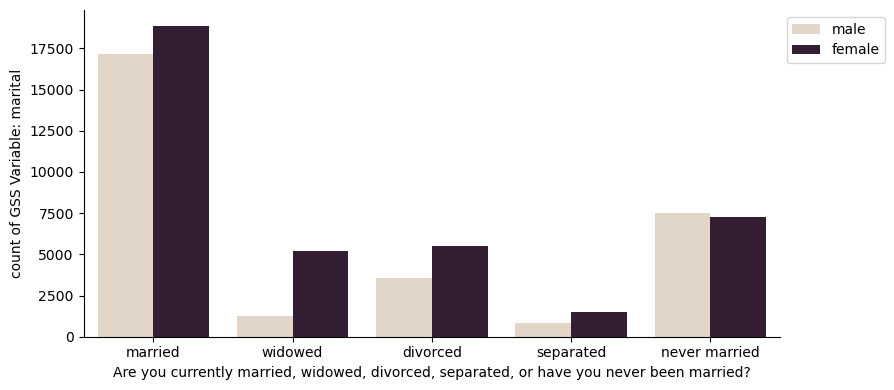

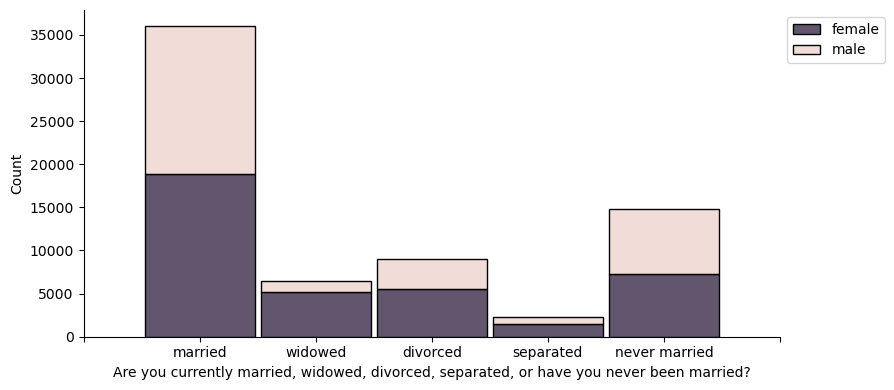

In [4]:
# Variable: marital
# Category bar plot, broken down by "sex"

p = sns.catplot(
    data=gss, 
    x="marital", 
    kind="count", 
    palette="ch:.25",
    hue="sex",
    height=4,
    aspect=2, 
    legend=False
)
labels = ['married',
          'widowed',
          'divorced',
          'separated',
          'never married']

t = "Are you currently married, widowed, divorced, separated, or have you never been married?"

p.set_xticklabels(labels)
p.set_xlabels(t)
p.set_ylabels('count of GSS Variable: marital')

plt.legend(labels=['male', 'female'], loc = 2, bbox_to_anchor = (1,1))


warnings.filterwarnings("ignore")
plt.draw()

labels = ['', 
          'married',
          'widowed',
          'divorced',
          'separated',
          'never married', 
          '']

p = sns.displot(
    data=gss, 
    kind="hist",
    x="marital",
    hue="sex", 
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95
)
p.set_xticklabels(labels)
p.set_xlabels(t)

plt.legend(labels=['female', 'male'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()
#gss_functions.values(gss['marital'])


# Variable: famdif16

This plot is a category horizontal bar, broken down by "sex"


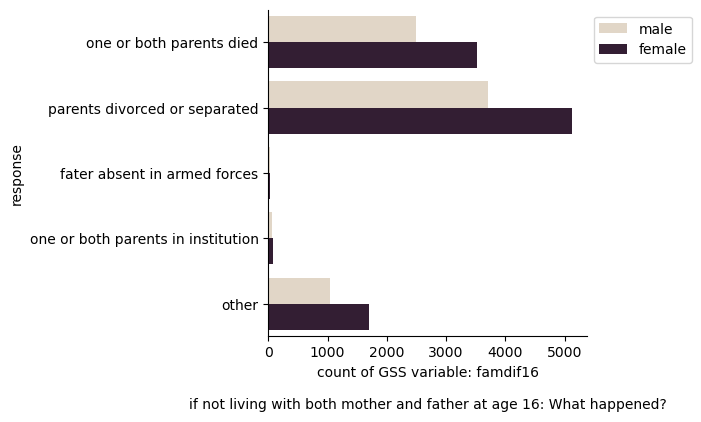

In [5]:
# Variable: famdif16
# Category horizontal bar plot, broken down by "sex"

famdif16 = sns.catplot(
    data=gss, 
    y="famdif16", 
    kind="count", 
    palette="ch:.25",
    hue="sex",
    height=4,
    aspect=1, 
    legend=False,
    orient='h',
)

labels = ['one or both parents died',
          'parents divorced or separated',
          'fater absent in armed forces',
          'one or both parents in institution',
          'other']

t = "count of GSS variable: famdif16\n\n" + \
    "if not living with both mother and father at age 16: What happened?"

famdif16.set_yticklabels(labels)
famdif16.set_xlabels(t)
famdif16.set_ylabels('response')
plt.legend(labels=['male', 'female'], loc = 2, bbox_to_anchor = (1,1))
# this removes output from plt.legend
warnings.filterwarnings("ignore")



# Variable: divorce

This is a simple yes or no question: have you been divorced?


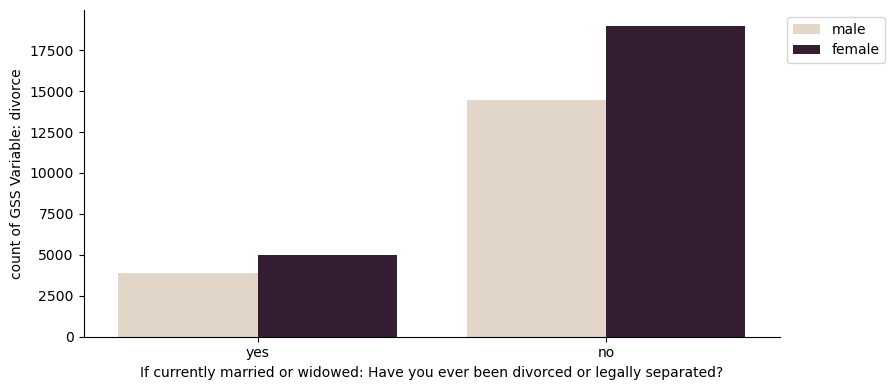

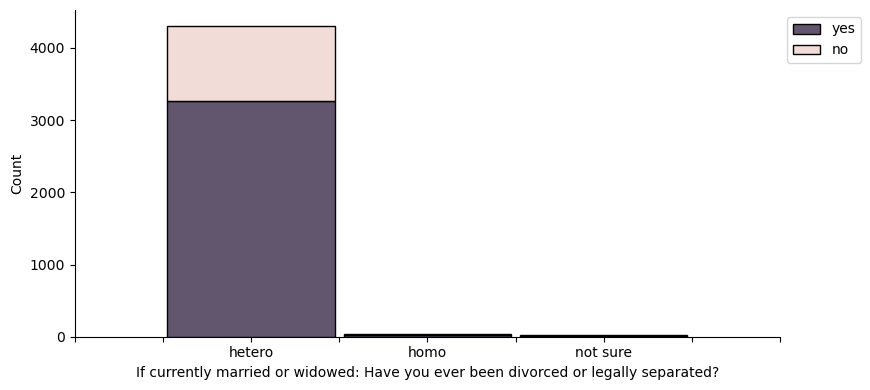

In [9]:
# Variable: divorce
# Category bar plot, broken down by "sex"

p = sns.catplot(
    data=gss, 
    x="divorce", 
    kind="count", 
    palette="ch:.25",
    hue="sex",
    height=4,
    aspect=2, 
    legend=False
)
labels = ['yes',
          'no']

t = "If currently married or widowed: Have you ever been divorced or legally separated?"

p.set_xticklabels(labels)
p.set_xlabels(t)
p.set_ylabels('count of GSS Variable: divorce')

plt.legend(labels=['male', 'female'], loc = 2, bbox_to_anchor = (1,1))


warnings.filterwarnings("ignore")
plt.draw()

l2 = ['', '',
    'hetero', '',
    'homo', '',
    'not sure', '',
    '']

p2 = sns.displot(
    data=gss, 
    kind="hist",
    x="martype",
    hue="divorce", 
    multiple="stack", 
    discrete=True, 
    height=4,
    aspect=2, 
    legend=False,
    shrink=.95
)
p2.set_xticklabels(l2)
p2.set_xlabels(t)

plt.legend(labels=['yes', 'no'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()
#gss_functions.values(gss['marital'])


# divlaw

this question looks at opinions toward divorce


In [ ]:
# martype, divlaw, divlawnv,

sns.set_theme()
sns.set_style("ticks")

p = sns.catplot(
    data=gss, 
    x="divlaw", 
    kind="count", 
    palette="ch:.25",
    hue="sex",
    height=4,
    aspect=2, 
    legend=False
)
labels = ['easier',
          'more difficult',
          'stay as is']

t = "Should divorce in this country be easier or more obtain than it is now?"

p.set_xticklabels(labels)
p.set_xlabels(t)
p.set_ylabels('count of GSS Variable: divlaw')

plt.legend(labels=['male', 'female'], loc = 2, bbox_to_anchor = (1,1))


warnings.filterwarnings("ignore")
plt.draw()

labels2 = ['', '', 'easier', '',
          'more difficult', '',
          'stay as is', '','']

h = sns.displot(
    data=gss, 
    kind="hist",
    x="divlaw",
    hue="sex", 
    multiple="stack", 
    discrete=True,  
    height=4,
    aspect=2, 
    legend=False,
    shrink=.8,
)

# need to change the x ticks

h.set_xticklabels(labels2)
h.set_xlabels(t)

plt.legend(labels=['female', 'male'], loc = 2, bbox_to_anchor = (1,1))
plt.draw()

#gss_functions.values(gss['divlaw'])
